<a href="https://colab.research.google.com/github/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Clustering_for_Market_segmentation_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FACULTY OF SCIENCE, ENGINEERING, AND COMPUTING
###School of Computer Science and Mathematics
##CI7000: Project Dissertation
#Title: Market Segmentation on pre and post
#Covid-19 data using Clustering and AutoML Algorithms


##A study towards Understanding  the effects of Machine learning model Choices
MSc. DATA SCIENCE

Module: Project Dissertation 

##Student ID: K1144343
###Supervisor: Dr. Nabajeet Barman

Clustering-for-Market-segmentation Coding

####################################################################################################

This Jupyter Notebook consists of the assignment of "Market Segmentation Practical Project" for the MSc. Data Science CI7000 Project Dissertation Module at the Kingston University. The methods and steps of coding are reference from the case studies as referenced in the below coding.This jupyter notebook belongs to Geetanjali Sawant student of MSc.Data Science,Kingston University,London.

####################################################################################################

# Objective and dataset information:


#Approach
In this notebook along with Python libraries such as Numpy, pandas,scitkit learn,matplotlib,seaborn,plotly,clustering algorithms, I will show how EvalML can be the used to carry to out data preprocessing, visualisation with AutoML(Automated Machine learning).EvalML is helps us to play around lots of options for customization to improve prediction outcomes.The steps will be as follows:

1.  load,read in the data and analyse it.
2.  Understand the data by visualisation.
3.  Perform data preprocessing.Removing of outliers from dataset.
4.  Rescaling the attributes like Recency, Monetory and frequency. 
5. Building the model
6. Discover a best performing pipeline based on the objective.
7. Review the best pipeline chosen and analyse its performance.
8. Conclusion








# Importing the dataset

##**Method 1**: From Github (official Pandas github link)


First, we will import the online reatail and market cap datasets directly from the official pandas github [link1](https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/Online%20Retail.xlsx)
[link2](https://github.com/geetanjalisawant16/AutoML-and-Clustering-for-Market-segmentation/blob/main/companies_market_cap.csv)

In [ ]:
# import all the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls


drive  sample_data


In [ ]:
retail = pd.read_csv('/content/drive/MyDrive/Online Retail.csv')

In [ ]:
post_covid = pd.read_csv('/content/drive/MyDrive/companies_market_cap.csv')

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [ ]:
retail.tail(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [ ]:
post_covid

,S.No,Company,Country,Sector,Market cap ($bn),Market cap added,Change
0,1,Amazon,US,Consumer discretionary,"1,317.30",401.1,43.8
1,2,Microsoft,US,Technology,"1,473.00",269.9,22.4
2,3,Apple,US,Technology,"1,523.90",219.1,16.8
3,4,Tesla,US,Consumer discretionary,183.8,108.4,143.8
4,5,Tencent,China,Communication services,550.9,93.1,20.3
...,...,...,...,...,...,...,...
95,96,Snap,US,Communication services,31.5,8.7,38.0
96,97,Changchun High & New Technology Industry,China,Healthcare,21.5,8.5,65.2
97,98,Chewy,US,Consumer discretionary,19.9,8.3,72.2
98,99,GSX Techedu,China,Consumer discretionary,13.4,8.2,160.1


In [ ]:
market = pd.merge(retail,post_covid)
market

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


# Initial Data Analysis:

> 1) Quality of data:

*    Frequency counts:
     The given dataset of covid-19 has got Structured and Unstructured data.
     It has got numeric(integer,float),Boolean(0,1) and strings i.e sequence
     of symbols kind of values in the data columns.
*    Discriptive/ Summary statistics.
      (mean,median,standard deviation, max,min,etc.)

*    Normality(frequency histograms)
  
> 2) Quality of Measurements,if applicable

> 3) Data Transformation: data transpose,data type change,sorting,deletion,etc.


## 1) Quality of data:


In [ ]:
# a) checking the Datatypes frequency: 
market.info() # Gives the information about Index, Datatype and Memory information.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48624 entries, 0 to 48623
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         48624 non-null  object 
 1   StockCode         48624 non-null  object 
 2   Description       48624 non-null  object 
 3   Quantity          48624 non-null  int64  
 4   InvoiceDate       48624 non-null  object 
 5   UnitPrice         48624 non-null  float64
 6   CustomerID        47829 non-null  float64
 7   Country           48624 non-null  object 
 8   S.No              48624 non-null  int64  
 9   Company           48624 non-null  object 
 10  Sector            48624 non-null  object 
 11  Market cap ($bn)  48624 non-null  object 
 12  Market cap added  48624 non-null  float64
 13  Change            48624 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.6+ MB


In [ ]:
for feature in market.columns:
    if market[feature].dtype not in ['int64', 'float64']:
        print(f'{feature}: {market[feature].unique()}')

InvoiceNo: ['536370' '536852' '536974' ... '559557' '560187' '564428']
StockCode: ['22728' '22727' '22726' ... '84877D' '84926A' '84877B']
Description: ['ALARM CLOCK BAKELIKE PINK' 'ALARM CLOCK BAKELIKE RED '
 'ALARM CLOCK BAKELIKE GREEN' ... 'WAKE UP COCKEREL TILE COASTER'
 'GREEN ROUND COMPACT MIRROR' 'TUMBLER BAROQUE']
InvoiceDate: ['01/12/2010 08:45' '03/12/2010 09:51' '03/12/2010 13:59' ...
 '11/07/2011 10:33' '15/07/2011 12:05' '25/08/2011 11:27']
Country: ['France' 'Australia' 'Netherlands' 'Germany' 'Switzerland' 'Japan'
 'Denmark' 'Sweden' 'Hong Kong' 'Singapore' 'Canada']
Company: ['Hermès International' "L'Oréal" 'Atlassian' 'ASML' 'Prosus' 'Adyen'
 'Just Eat Takeaway' 'Unilever' 'Audi' 'Roche' 'Nestlé' 'Lonza'
 'Chugai Pharmaceutical' 'Keyence' 'Daiichi Sankyo' 'Novo Nordisk'
 'Spotify' 'Alibaba Health Information Technology' 'Sea Group' 'Shopify'
 'Barrick Gold' 'Lululemon Athletica']
Sector: ['Consumer discretionary' 'Consumer staples' 'Technology' 'Healthcare'
 'Communic

In [ ]:
market.count() # returns the value of non-null values in each Dataframe(market)

InvoiceNo           48624
StockCode           48624
Description         48624
Quantity            48624
InvoiceDate         48624
UnitPrice           48624
CustomerID          47829
Country             48624
S.No                48624
Company             48624
Sector              48624
Market cap ($bn)    48624
Market cap added    48624
Change              48624
dtype: int64

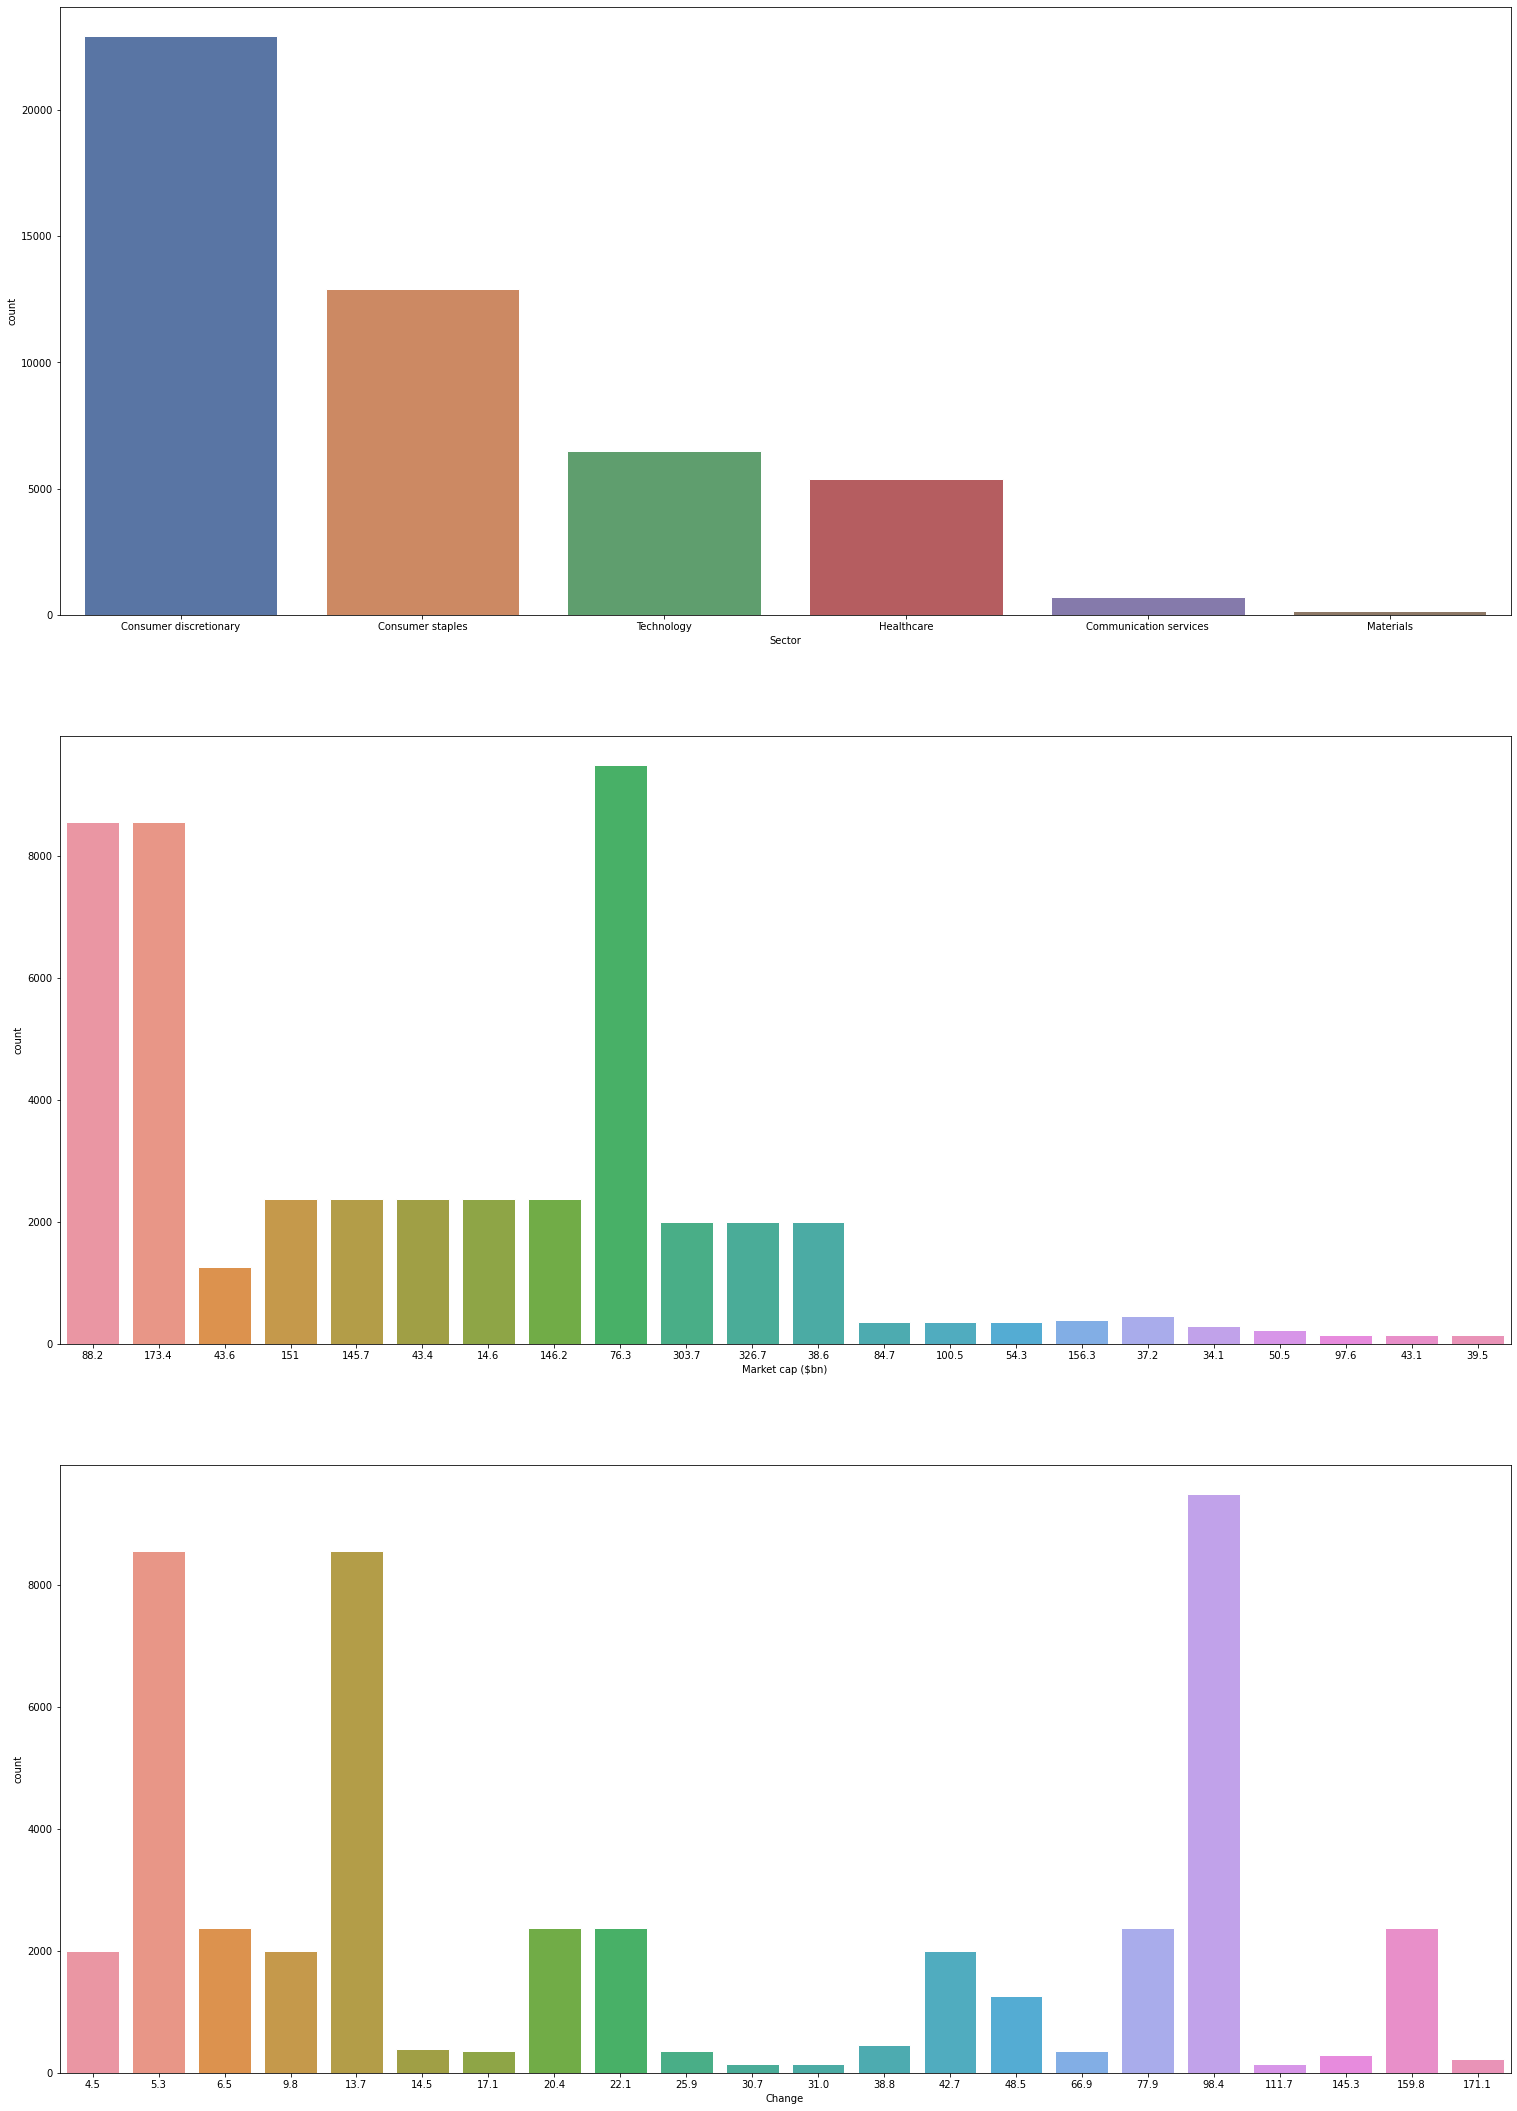

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(26, 38))
sns.set(font_scale=1.2)
cols_ = ["Sector", "Market cap ($bn)", "Change"]

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=market, ax=ax[ind])

Text(0.5, 1.0, 'Correlation Chart for Market Dataset')

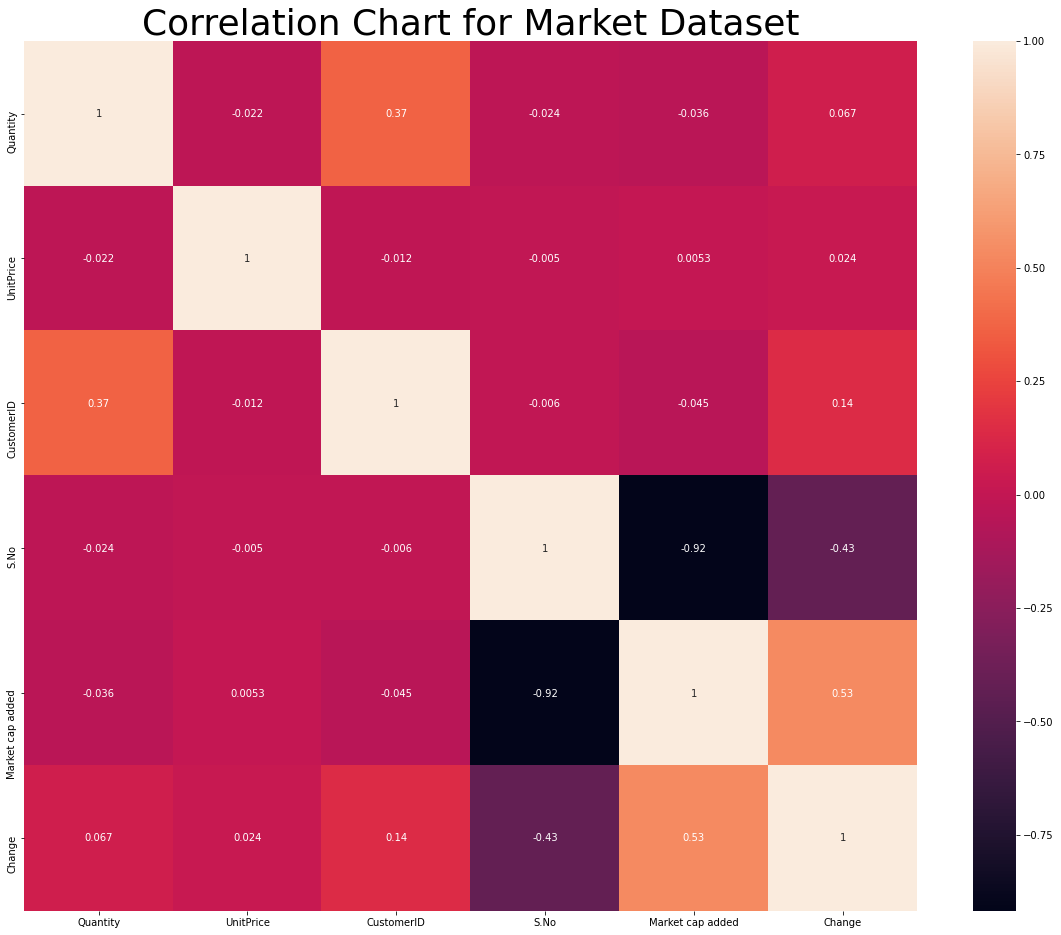

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = market.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
ax = sns.heatmap(df_corr,mask=mask, annot=True)
plt.title('Correlation Chart for Market Dataset',fontsize=36)

In [ ]:
# b) Descriptive/ Summary Statistics(mean,meadian,standard deviation,max,min,etc)
market.describe() # gives Summary staistics for numerical columns

,Quantity,UnitPrice,CustomerID,S.No,Market cap added,Change
count,48624.000000,48624.000000,47829.000000,48624.000000,48624.000000,48624.000000
mean,33.963619,4.653855,13161.048297,56.485830,18.868104,43.640058
std,73.552953,64.830839,995.588752,30.563052,11.334199,45.999461
min,-624.000000,0.000000,12357.000000,14.000000,8.800000,4.500000
25%,6.000000,1.050000,12532.000000,25.000000,9.000000,6.500000
50%,12.000000,1.650000,12681.000000,62.000000,11.600000,20.400000
75%,25.000000,3.350000,13813.000000,92.000000,27.300000,98.400000
max,2400.000000,4161.060000,17844.000000,95.000000,51.500000,171.100000


In [ ]:
market.equals(market)

True

In [ ]:
market.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            48614, 48615, 48616, 48617, 48618, 48619, 48620, 48621, 48622,
            48623],
           dtype='int64', length=48624)

In [ ]:
market.shape

(48624, 14)

In [ ]:
market.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48620,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48621,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48622,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Data Cleaning


In [ ]:
# find duplicates
market[market.duplicated()] 
# the o/p shows there are duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
3568,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,21/03/2011 12:42,1.65,12637.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3569,547194,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,21/03/2011 12:42,1.65,12637.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
3614,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,21/03/2011 12:42,2.95,12637.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3615,547194,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,21/03/2011 12:42,2.95,12637.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
5100,552826,82583,HOT BATHS METAL SIGN,4,11/05/2011 13:20,2.10,14277.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47484,564539,22378,WALL TIDY RETROSPOT,5,25/08/2011 15:22,2.10,12715.0,Sweden,77,Spotify,Communication services,37.2,10.4,38.8
47707,541975,22452,MEASURING TAPE BABUSHKA PINK,24,24/01/2011 14:24,2.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3
47708,541975,22454,MEASURING TAPE BABUSHKA RED,24,24/01/2011 14:24,2.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3
47709,541975,20749,ASSORTED COLOUR MINI CASES,6,24/01/2011 14:24,7.95,NaN,Hong Kong,30,Alibaba Health Information Technology,Healthcare,34.1,20.2,145.3


In [ ]:
market.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


In [ ]:
# count the number of null values of all columns
market.isnull().sum()
# o/p
# customerID values can be removed


InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID          795
Country               0
S.No                  0
Company               0
Sector                0
Market cap ($bn)      0
Market cap added      0
Change                0
dtype: int64

Text(0.5, 1.0, 'Checking null values by using heatmap')

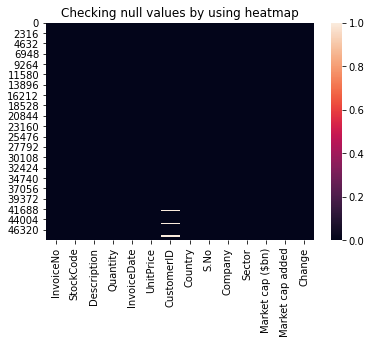

In [ ]:
import seaborn as sns
sns .heatmap(market.isnull())
plt.title('Checking null values by using heatmap') # we can show missing values graphically presented

In [ ]:
# Droping rows having missing values

market = market.dropna()
market.shape

(47829, 14)

In [ ]:
# count the number of null values of all columns
market.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
S.No                0
Company             0
Sector              0
Market cap ($bn)    0
Market cap added    0
Change              0
dtype: int64

In [ ]:
market

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,S.No,Company,Sector,Market cap ($bn),Market cap added,Change
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
1,536370,22728,ALARM CLOCK BAKELIKE PINK,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
2,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
3,536370,22727,ALARM CLOCK BAKELIKE RED,24,01/12/2010 08:45,3.75,12583.0,France,95,L'Oréal,Consumer staples,173.4,8.8,5.3
4,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,01/12/2010 08:45,3.75,12583.0,France,75,Hermès International,Consumer discretionary,88.2,10.6,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7
48620,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,25/08/2011 11:27,1.25,17844.0,Canada,87,Lululemon Athletica,Consumer discretionary,39.5,9.4,31.0
48621,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,14,Shopify,Technology,97.6,51.5,111.7
48622,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,25/08/2011 11:27,0.83,17844.0,Canada,81,Barrick Gold,Materials,43.1,10.1,30.7


#Data Visualisation:

code reference: https://www.kaggle.com/roshansharma/online-retail-transactions-in-uk


In [ ]:
!pip install plotly

In [ ]:
!pip install dash

     |████████████████████████████████| 7.3 MB 13.2 MB/s 
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
     |████████████████████████████████| 357 kB 55.0 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=e966bce88386e82bb0226688bd1987f3da214deb65660427ca727d27ee1d05e8
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=eb9a631cbee3991951c6ad6a18694959e29daacac97eb607e4774bf41c5ff292
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=69304aead3b5c8c6f337556df5d9f4b2902d81e942031a4e0e597a0c5daaad8a
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663ae

In [ ]:
from plotly import __version__

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [ ]:
# Using plotly.express
import plotly.express as px


In [ ]:
# Using graph_objects
import plotly.graph_objects as go
fig = go.Figure([go.Scatter3d(x=market['InvoiceDate'], y=market['Country'])])
fig.show()

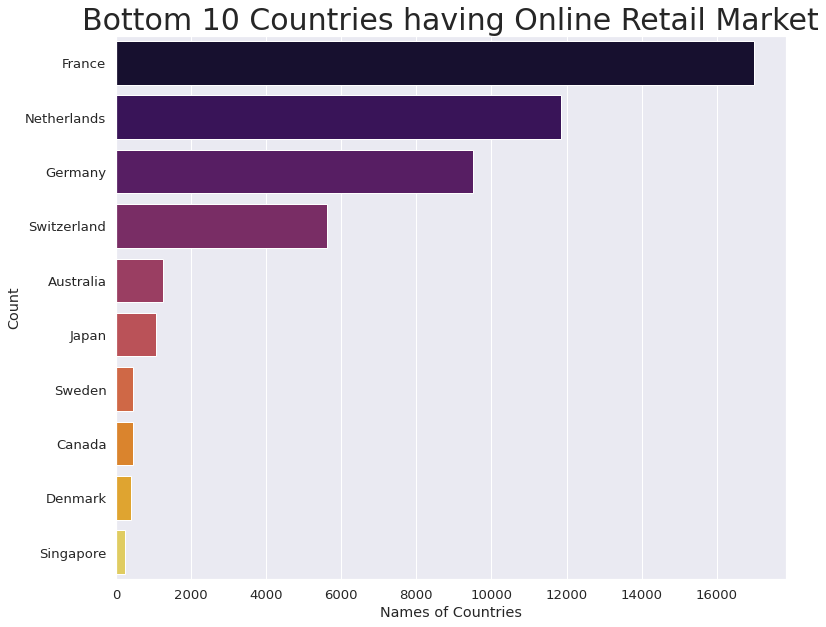

In [ ]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = market['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 10 Countries having Online Retail Market', fontsize = 30)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

Country
France         219696
Germany        117448
Switzerland     89334
Australia       83653
Japan           75654
Sweden          35637
Canada           8289
Denmark          8188
Singapore        5234
Name: Quantity, dtype: int64


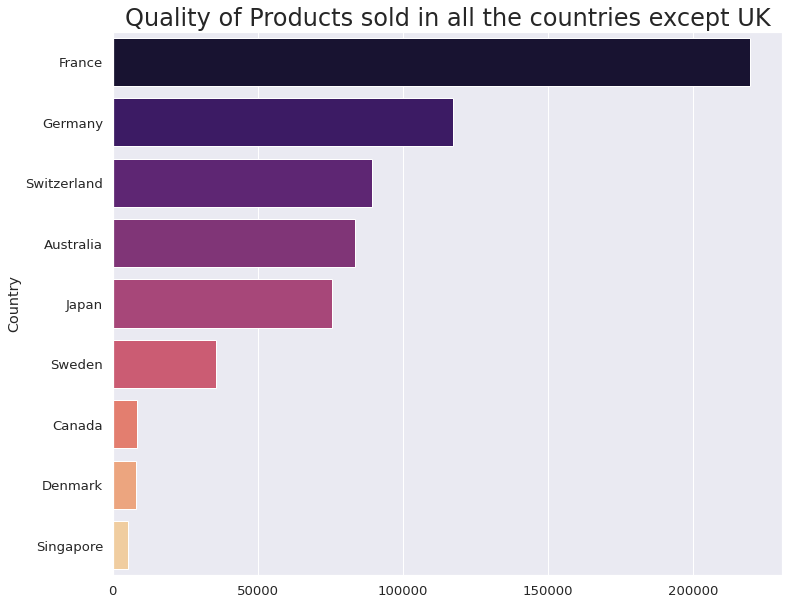

In [ ]:
# checking how many quantity of products have been sold online from each country

M = market['Quantity'].groupby(market['Country']).agg('sum').sort_values(ascending = False)[1:]
print(M)

sns.barplot(x = M.values, y = M.index, palette = 'magma')
plt.title('Quality of Products sold in all the countries except UK',fontsize=24)
plt.show()

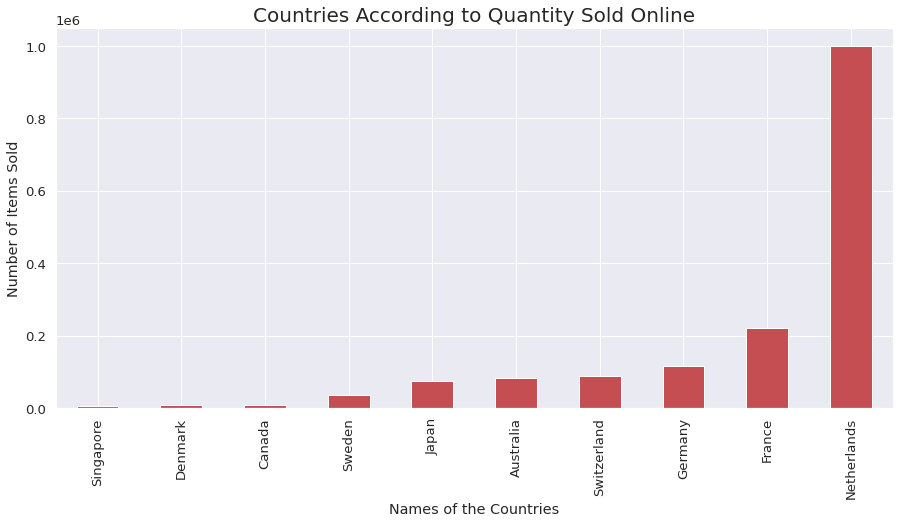

In [ ]:
# Having a look at the Countries in terms of Quantities according Sold Online

#color = plt.cm.viridis(np.linspace(0, 1, 20))
market.groupby(market['Country'])['Quantity'].agg('sum').sort_values(ascending = True).plot.bar(figsize = (15, 7),color ='r')

plt.title('Countries According to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

In [ ]:
# FEATURE ENGINEERING 
# ADDING A COLUMN TO THE DATASET

# sales = unitprice*quantity

market['Sales'] = market['UnitPrice'] * market['Quantity']



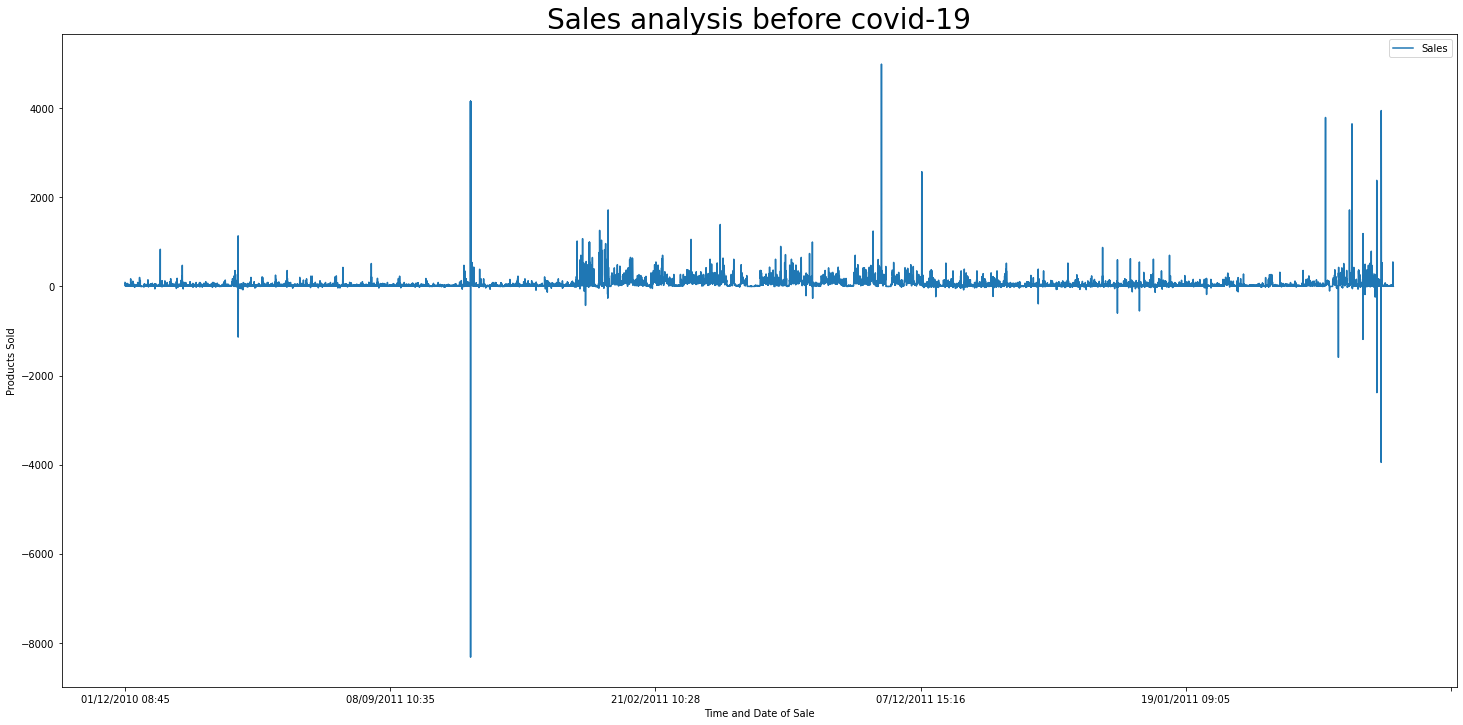

In [ ]:
# Sales Aanalysis
market.plot(x = 'InvoiceDate', y = 'Sales',figsize=(25,12))
plt.title("Sales analysis before covid-19", fontsize = 28)
plt.xlabel('Time and Date of Sale')
plt.ylabel('Products Sold')
plt.show()

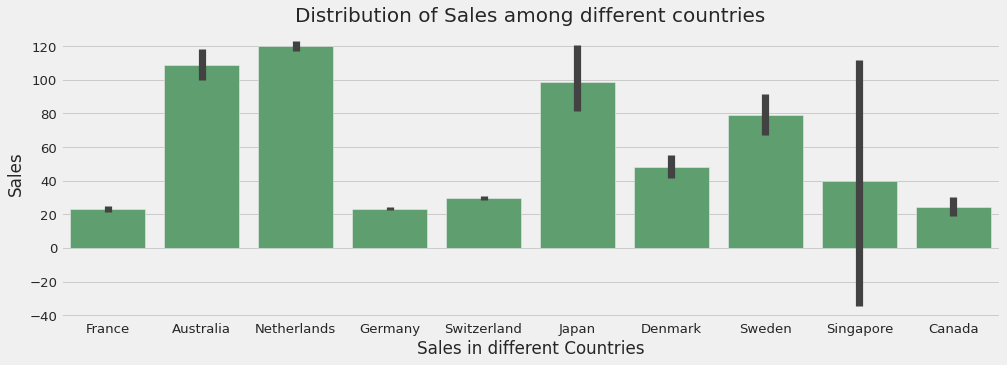

In [ ]:
# visualizing the sales in the entire globe
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(x=market['Country'],y=market['Sales'], color = 'g',data=market)
plt.title('Distribution of Sales among different countries', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

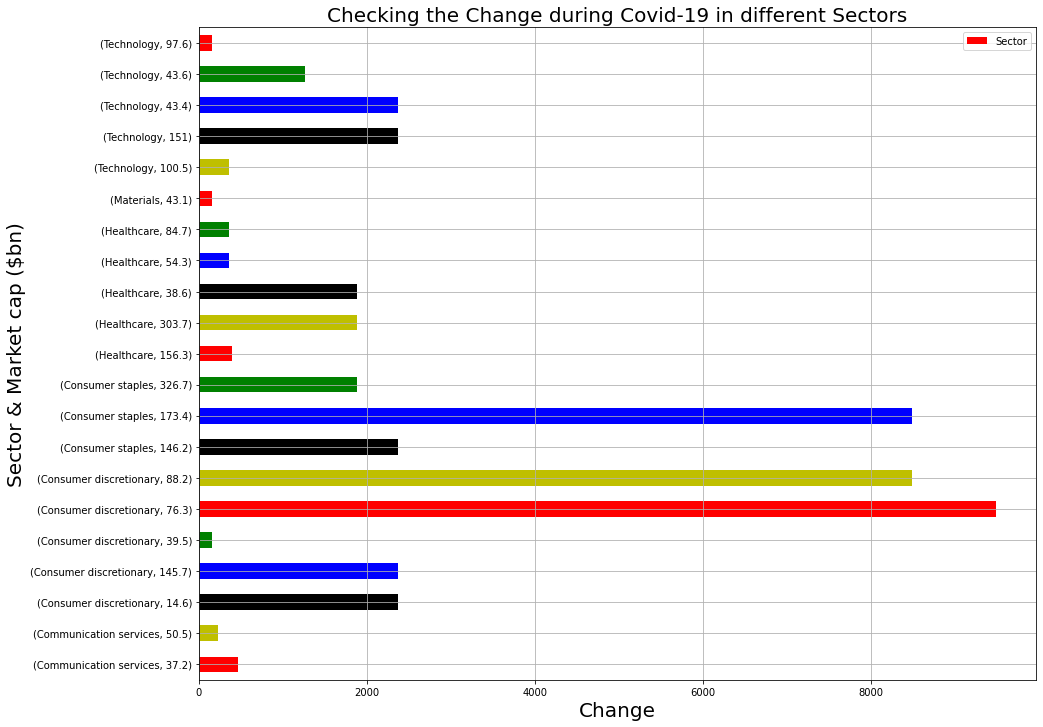

In [ ]:
# Checking the market Cap added after Covid

a = market.groupby(['Sector','Market cap ($bn)']).count()['Change'].plot.barh(figsize=(15,12),grid=True,color=['r','y','k','b','g'])
#market.groupby(['Sector','Change']).count()['Market cap ($bn)'].plot.pie(autopct='%1.1f%%',figsize=[18,18])
#sns.barplot(x=market['Change'],y=market['Market cap ($bn)'],hue='Sector',palette="dark",data=market,alpha=.6)

plt.title('Checking the Change during Covid-19 in different Sectors',fontsize=20)
plt.xlabel('Change',fontsize = 20)
plt.ylabel('Sector & Market cap ($bn)',fontsize =20)
#plt.legend(['Sector'])
plt.show()

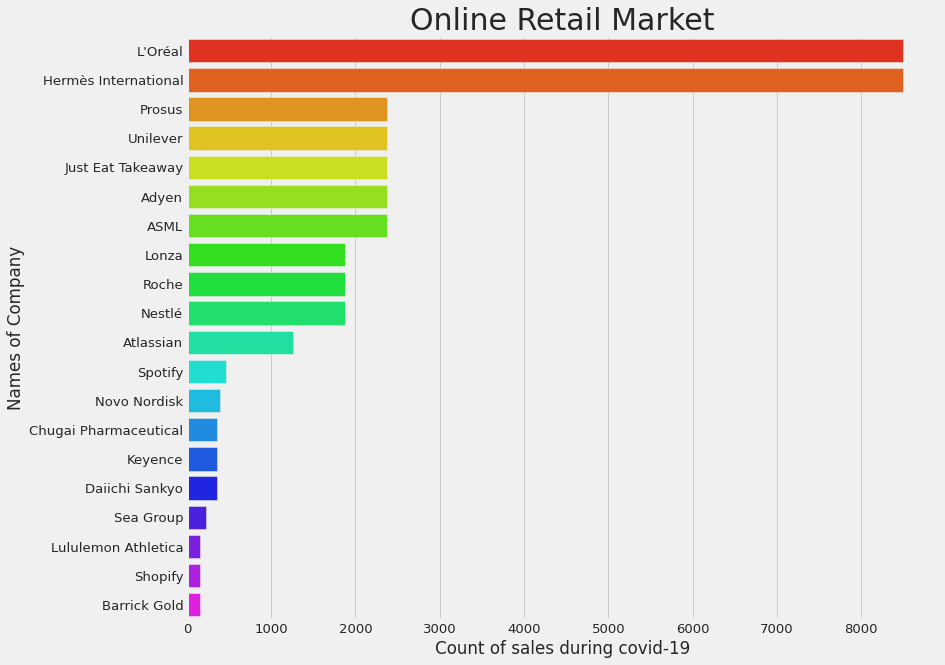

In [ ]:
# Checking the different sales count of Company prospering during Covid-19

plt.rcParams['figure.figsize'] = (12, 10)
a = market['Company'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'gist_rainbow')
plt.title('Online Retail Market', fontsize = 30)
plt.xlabel('Count of sales during covid-19')
plt.ylabel('Names of Company')
plt.show()

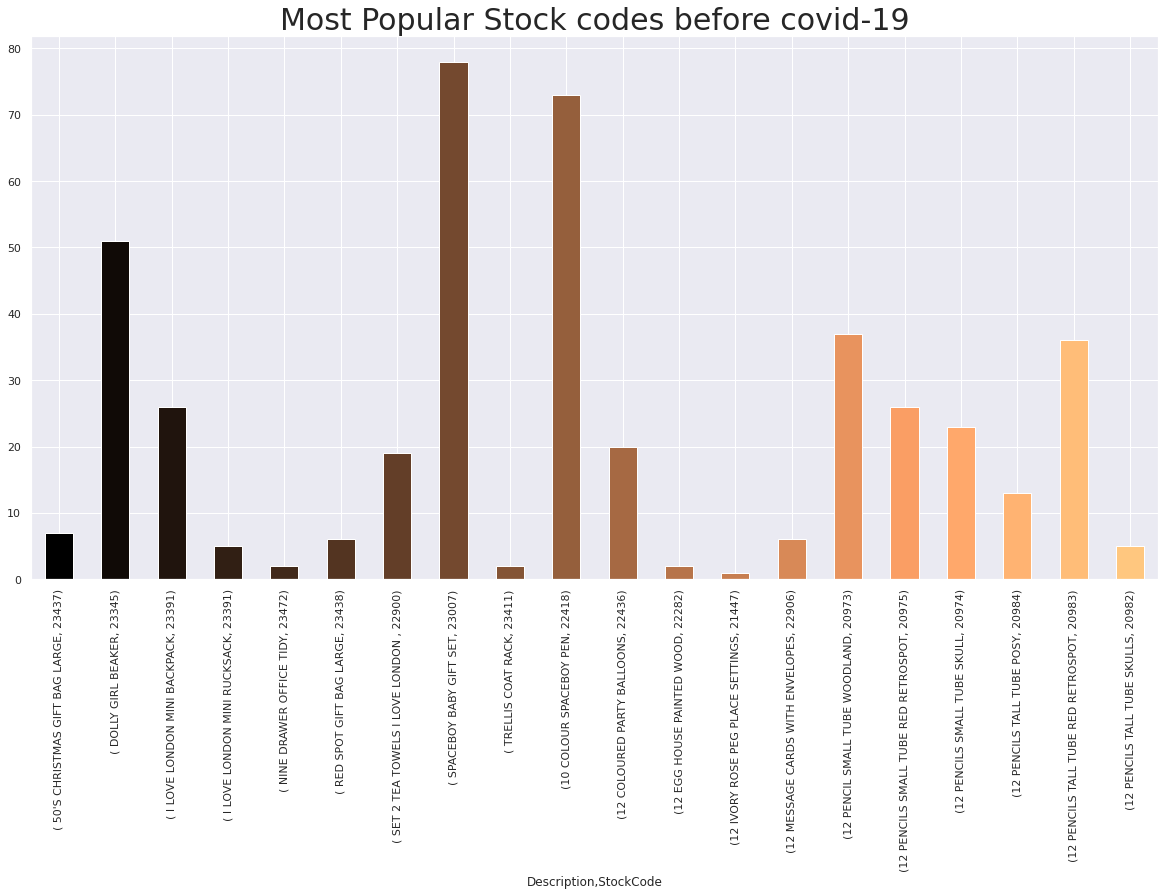

In [ ]:
# looking the first 20 stockcode for the dataset
#code reference https://www.kaggle.com/roshansharma/online-retail-transactions-in-uk

color = plt.cm.copper(np.linspace(0, 1, 20))
market.groupby(['Description'])['StockCode'].value_counts().head(20).plot.bar(color = color, figsize = (18, 10))
plt.title('Most Popular Stock codes before covid-19', fontsize = 30)
plt.show()

#Data Preparation

## Analysis of the Customers according to following considerations:
* R: Count of days from last purchase
* F: occurrence of transactions.
* M: Overall amount of sale(profit gain).






In [ ]:
# New Attribute : Monetary

market['Amount'] = market['Quantity']*market['UnitPrice']
rfm_monetary = market.groupby('CustomerID')['Amount'].sum()
rfm_monetary = rfm_monetary.reset_index()

rfm_monetary.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Amount
0,12357.0,18623.01
1,12367.0,168.90
2,12371.0,5663.88
3,12372.0,1298.04
4,12377.0,4884.36


In [ ]:
# New Attribute : Frequency
market['Class'] = market['Sector']+market['Company']
rfm_frequency = market.groupby('CustomerID')['Class'].sum()


In [ ]:
rfm_frequency = market.groupby('CustomerID')[['InvoiceNo','Class']].count()
rfm_frequency = rfm_frequency.reset_index()
rfm_frequency.columns = ['CustomerID','Frequency','Class']
rfm_frequency.head()

,CustomerID,Frequency,Class
0,12357.0,393,393
1,12367.0,11,11
2,12371.0,189,189
3,12372.0,52,52
4,12377.0,231,231


In [ ]:
# Merging the two dfs rfm_m, rfm_f

rfm = pd.merge(rfm_monetary, rfm_frequency, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Class
0,12357.0,18623.01,393,393
1,12367.0,168.90,11,11
2,12371.0,5663.88,189,189
3,12372.0,1298.04,52,52
4,12377.0,4884.36,231,231


In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

market['InvoiceDate'] = pd.to_datetime(market['InvoiceDate'],format='%d/%m/%Y %H:%M')

In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(market['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date

market['Recency'] = max_date - market['InvoiceDate']
market.head()

In [ ]:
market.to_csv('new_market.csv')

In [ ]:
# Compute last transaction date to get the recency of customers

rfm_period = market.groupby('CustomerID')['Recency'].min()
rfm_period = rfm_period.reset_index()
rfm_period.head()

,CustomerID,Recency
0,12357.0,32 days 20:43:00
1,12367.0,3 days 20:02:00
2,12371.0,44 days 02:34:00
3,12372.0,71 days 00:38:00
4,12377.0,314 days 21:05:00


In [ ]:
# Extract number of days only

rfm_period['Recency'] = rfm_period['Recency'].dt.days
rfm_period.head()

,CustomerID,Recency
0,12357.0,32
1,12367.0,3
2,12371.0,44
3,12372.0,71
4,12377.0,314


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_period, on='CustomerID',how='inner')
#rfm.columns = ['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency
0,12357.0,18623.01,393,393,32
1,12367.0,168.90,11,11,3
2,12371.0,5663.88,189,189,44
3,12372.0,1298.04,52,52,71
4,12377.0,4884.36,231,231,314


##The removal of outliers from the dataset by two methods:


1. Statistical
2. Domain Specific



Text(0.5, 0, 'Attributes')

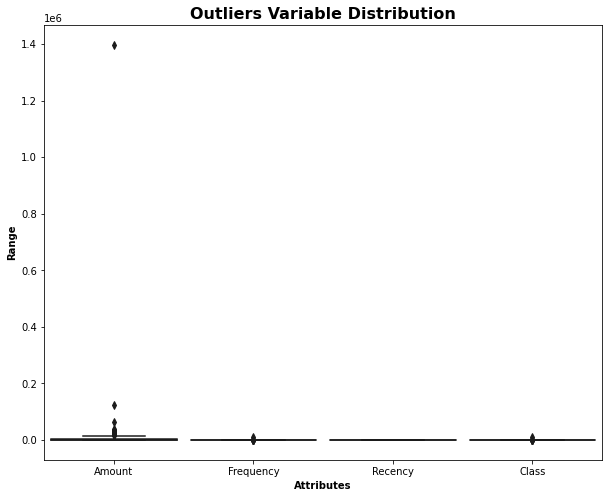

In [ ]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency','Class']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v" ,whis=2.8,saturation=1.9, width=0.9,palette='copper')
plt.title("Outliers Variable Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Amount  # reference :https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
rfm

,CustomerID,Amount,Frequency,Class,Recency
0,12357.0,18623.01,393,393,32
1,12367.0,168.90,11,11,3
2,12371.0,5663.88,189,189,44
3,12372.0,1298.04,52,52,71
4,12377.0,4884.36,231,231,314
...,...,...,...,...,...
245,16321.0,230.70,16,16,71
246,17404.0,30300.82,201,201,3
247,17443.0,1602.72,3,3,219
248,17444.0,8820.12,405,405,147


##Rescaling the attributes
It is very important to rescale the variables to have comparable scale.There are two ways of rescaling such as:


1.   Min-max scalng
2.  standardisation (mean=0, sigma=1)



In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(246, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,2.581460,1.428642,-0.548664
1,-0.612947,-0.735532,-0.835395
2,0.338234,0.272905,-0.430016
3,-0.417493,-0.503251,-0.163060
4,0.203300,0.510851,2.239550


#Building the model


In [ ]:
# Importing machinelearning library
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
print(kmeans.fit(rfm_df_scaled))
print(kmeans.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[2 3 0 3 1 2 3 1 3 3 3 0 3 3 2 1 3 3 3 3 1 1 3 3 0 3 3 0 1 2 3 0 0 3 3 3 2
 0 3 0 3 0 0 3 3 0 3 3 1 0 3 3 1 3 3 3 3 1 3 1 3 1 3 3 0 3 3 3 3 3 0 3 3 3
 3 3 3 3 3 3 0 0 1 3 1 0 1 3 2 0 3 3 1 1 0 3 1 3 2 1 3 1 3 3 0 3 3 1 3 3 3
 1 3 3 3 1 0 3 3 3 3 0 1 1 3 1 0 0 3 3 3 2 3 1 3 3 3 3 3 3 3 3 3 3 1 1 3 0
 3 3 3 3 0 1 3 3 0 1 3 3 3 2 3 3 2 2 0 0 1 3 1 3 3 3 3 3 0 3 3 3 0 1 3 0 3
 3 3 0 3 3 3 3 0 0 3 3 3 0 0 3 3 2 1 1 1 1 1 3 0 1 1 3 0 3 1 0 0 3 3 1 1 0
 1 3 3 1 1 2 0 3 1 3 3 3 3 3 3 3 0 3 1 3 2 1 0 3]


In [ ]:
# Elbow-curve/SSD

ssd = [] # ssd = sum of squared distance, it is a curve
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans ( n_clusters=num_clusters, max_iter=50 )
    kmeans.fit ( rfm_df_scaled )

    ssd.append ( kmeans.inertia_ )

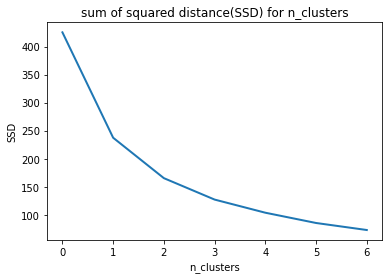

In [ ]:
# plot the SSDs for each n_clusters 
# Elbow method helps to find best value for k. 
plt.plot(ssd,scalex=True,scaley=True,linewidth=2)
plt.title('sum of squared distance(SSD) for n_clusters')
plt.xlabel('n_clusters')
plt.ylabel('SSD')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


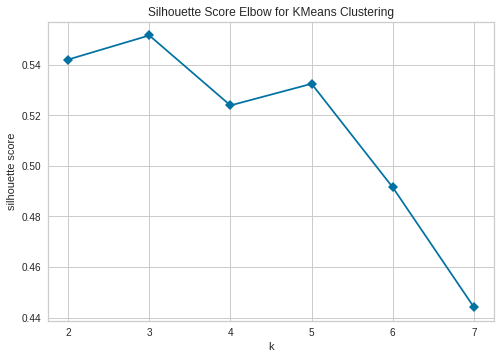

In [ ]:
#the below code for silhouette_score visualizer is taken reference from
#https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
score = KMeans(random_state=0)

# Initiate the elbow with the best vakue of k with number of clusters and the metric 
best_k = KElbowVisualizer(score, k=(2,8), metric='silhouette', timings=False)

# Fit the data and visualize
best_k.fit(rfm_df_scaled)    
best_k.poof()

In [ ]:
# Silhouette Analysis
from sklearn import metrics
from sklearn.metrics import silhouette_score

range_num_clstrs = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_num_clstrs:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    clstr_lbls = kmeans.labels_
    
    # silhouette score
    sil_avg = silhouette_score(rfm_df_scaled, clstr_lbls)
    print("num_clusters={0}, obtained Silhouette score {1}".format(num_clusters, sil_avg))

num_clusters=2, obtained Silhouette score 0.5419727051514495
num_clusters=3, obtained Silhouette score 0.5515166711749621
num_clusters=4, obtained Silhouette score 0.5238510407649032
num_clusters=5, obtained Silhouette score 0.5385586340923186
num_clusters=6, obtained Silhouette score 0.47379679768749433
num_clusters=7, obtained Silhouette score 0.4107800126914035
num_clusters=8, obtained Silhouette score 0.4116691190956903


In [ ]:

# based on the above num_clusters=3, obtained Silhouette score 0.5491707330645001
# Final model with k=3 
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
 kmeans.labels_

array([1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2,
       2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       1, 2, 1, 0], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency,Cluster_Id
0,12357.0,18623.01,393,393,32,1
1,12367.0,168.90,11,11,3,0
2,12371.0,5663.88,189,189,44,0
3,12372.0,1298.04,52,52,71,0
4,12377.0,4884.36,231,231,314,2


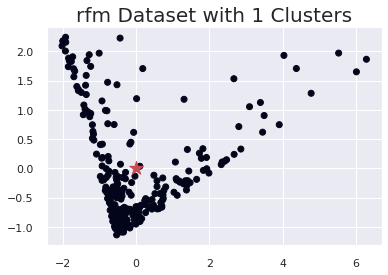

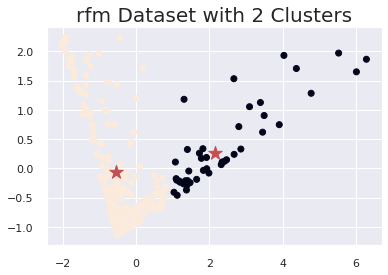

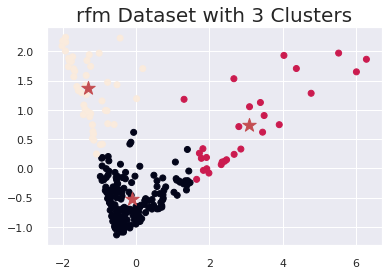

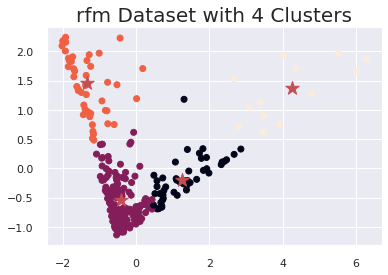

In [ ]:
# The below code is a reference from my Wine machine learning module coursework.
# Kmeans with Dimentionality Reduction using PCA
from sklearn.decomposition import PCA # required to do dimentionality reduction


pca_rfm = PCA(n_components=3)
principalComponents = pca_rfm.fit_transform(rfm_df_scaled) # rfm_df_scaled is a normalised data function
PCA_components = pd.DataFrame(principalComponents) # Putting components in a dataframe for later

array_pca=[]
for i in range(1, 5):
    model_kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1, n_init = 10, random_state = 5)
    model_kmeans_pca.fit(PCA_components.iloc[:, :2])
    labels = model_kmeans_pca.predict(PCA_components.iloc[:, :2])
    centroids = model_kmeans_pca.cluster_centers_
    array_pca.append(model_kmeans_pca.inertia_)
    plt.scatter(PCA_components[0], PCA_components[1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='*',color='r')
    plt.title("rfm Dataset with " + str(i) + " Clusters", fontsize=20)
    plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, v_measure_score, completeness_score, adjusted_mutual_info_score

In [ ]:
# 1st Clustering Method (K-means Clustering)
print("\1st Clustering Method: K- means")
print("---------------------------------------------------")
labels_kmeans = labels
labels_true = kmeans.labels_
print("Adjusted Random Score: ", adjusted_rand_score(labels_true, labels_kmeans))
print("Homogeneity Score: ", homogeneity_score(labels_true, labels_kmeans))
print("V-Measure Score: ", v_measure_score(labels_true, labels_kmeans))
print ("Completeness: ", completeness_score(labels_true, labels_kmeans))
print ("Adjusted Mutual Information: ", adjusted_mutual_info_score(labels_true, labels_kmeans))

st Clustering Method: K- means
---------------------------------------------------
Adjusted Random Score:  0.6392166698024555
Homogeneity Score:  0.7837845661330659
V-Measure Score:  0.674585203171668
Completeness:  0.5920929297393444
Adjusted Mutual Information:  0.6701837012629993


Text(0.5, 1.0, 'ClusterID v/s Amount')

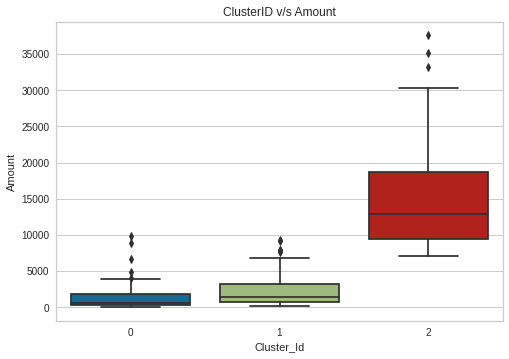

In [ ]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)
plt.title('ClusterID v/s Amount')

Text(0.5, 1.0, 'ClusterID v/s Frequency')

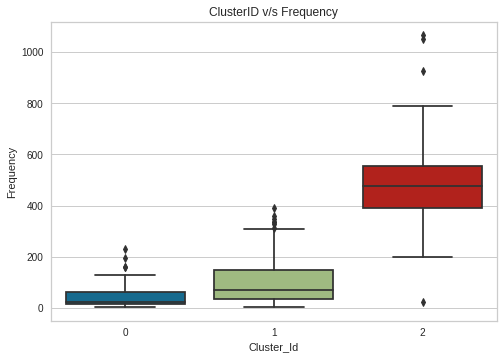

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)
plt.title('ClusterID v/s Frequency')

Text(0.5, 1.0, 'ClusterID v/s Recency')

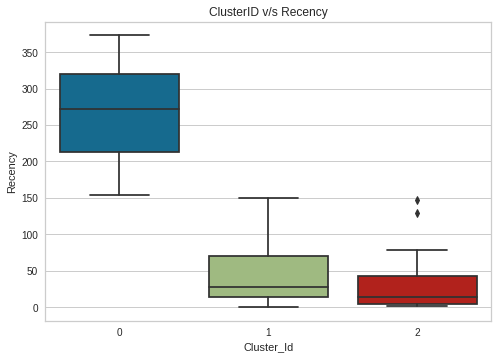

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)
plt.title('ClusterID v/s Recency')

In [ ]:
import scipy.cluster.hierarchy as sch

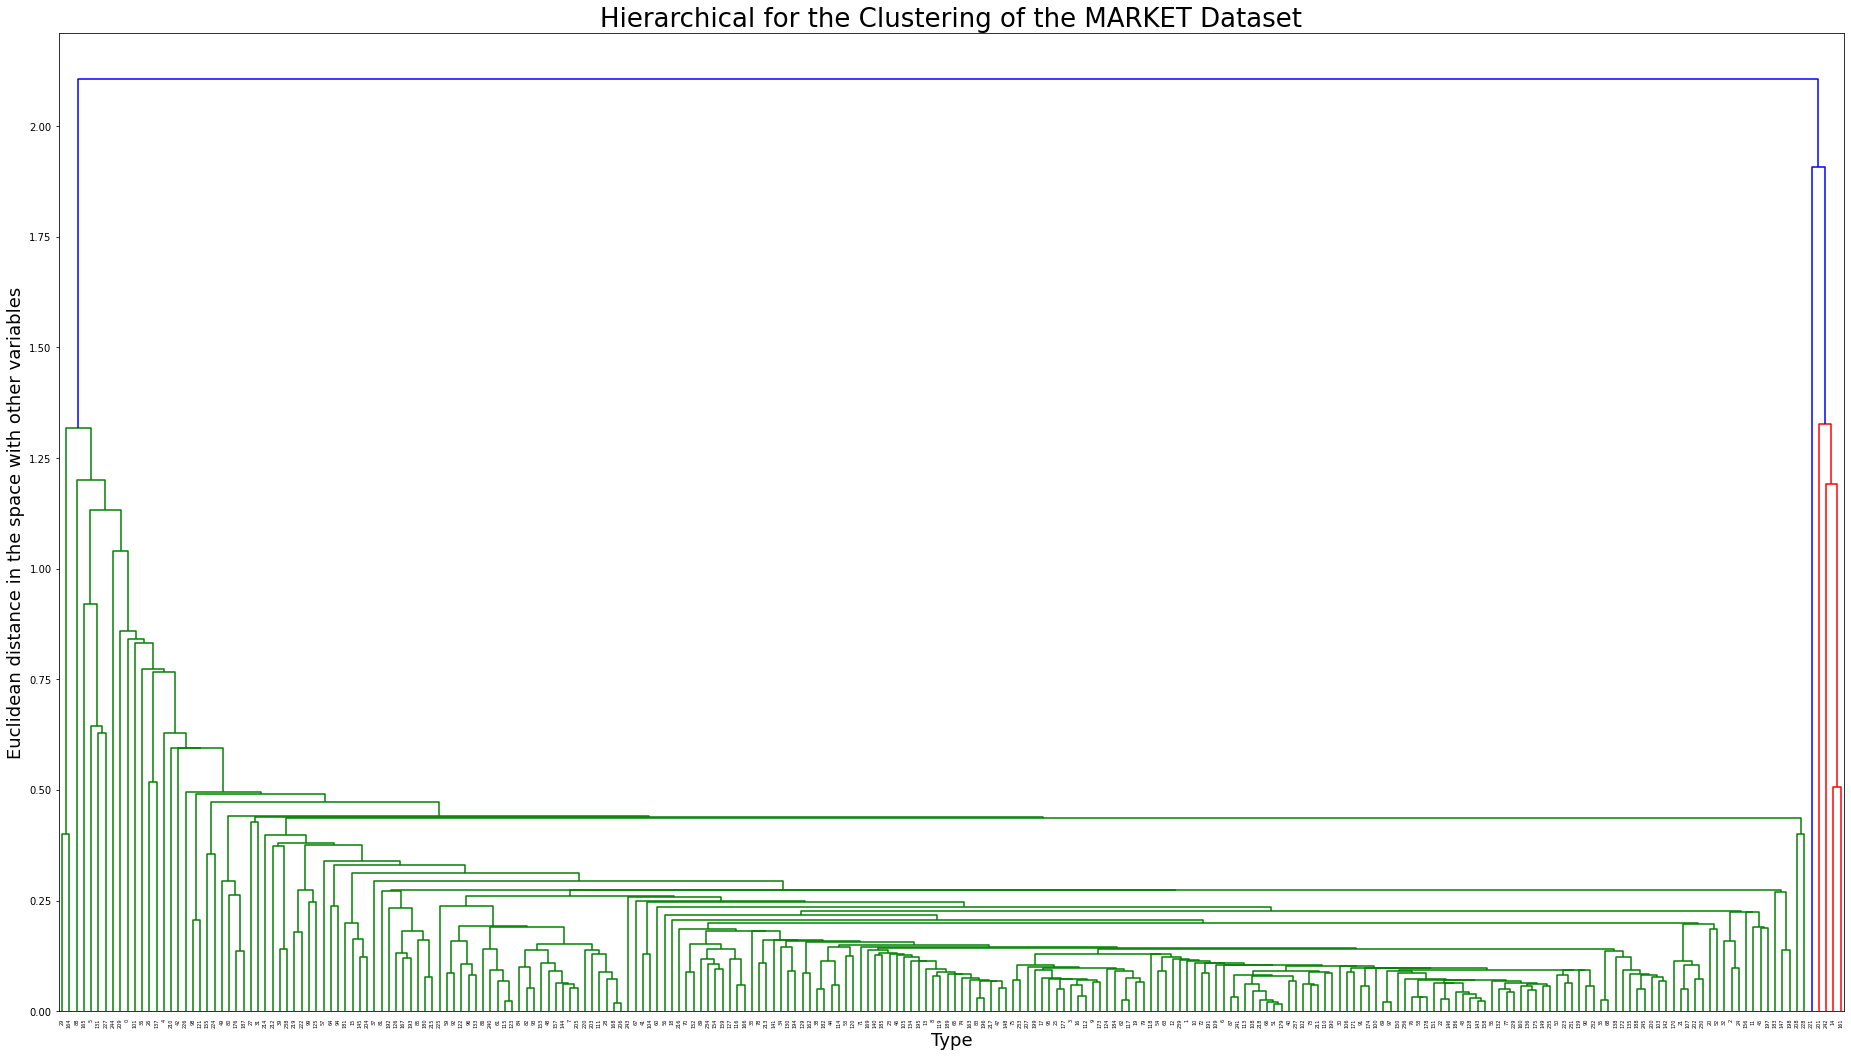

In [ ]:
# Below code of algorithms and metrics
# is the code from my own jupyter notebooks
# from my coursework assignments
# Single linkage method:
Hierarchical_clust = sch.linkage(rfm_df_scaled, method = 'single')
plt.figure(figsize=(32,18))
den = sch.dendrogram(Hierarchical_clust)
plt.title('Hierarchical for the Clustering of the MARKET Dataset', fontsize=26)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Euclidean distance in the space with other variables', fontsize=18)
plt.show()

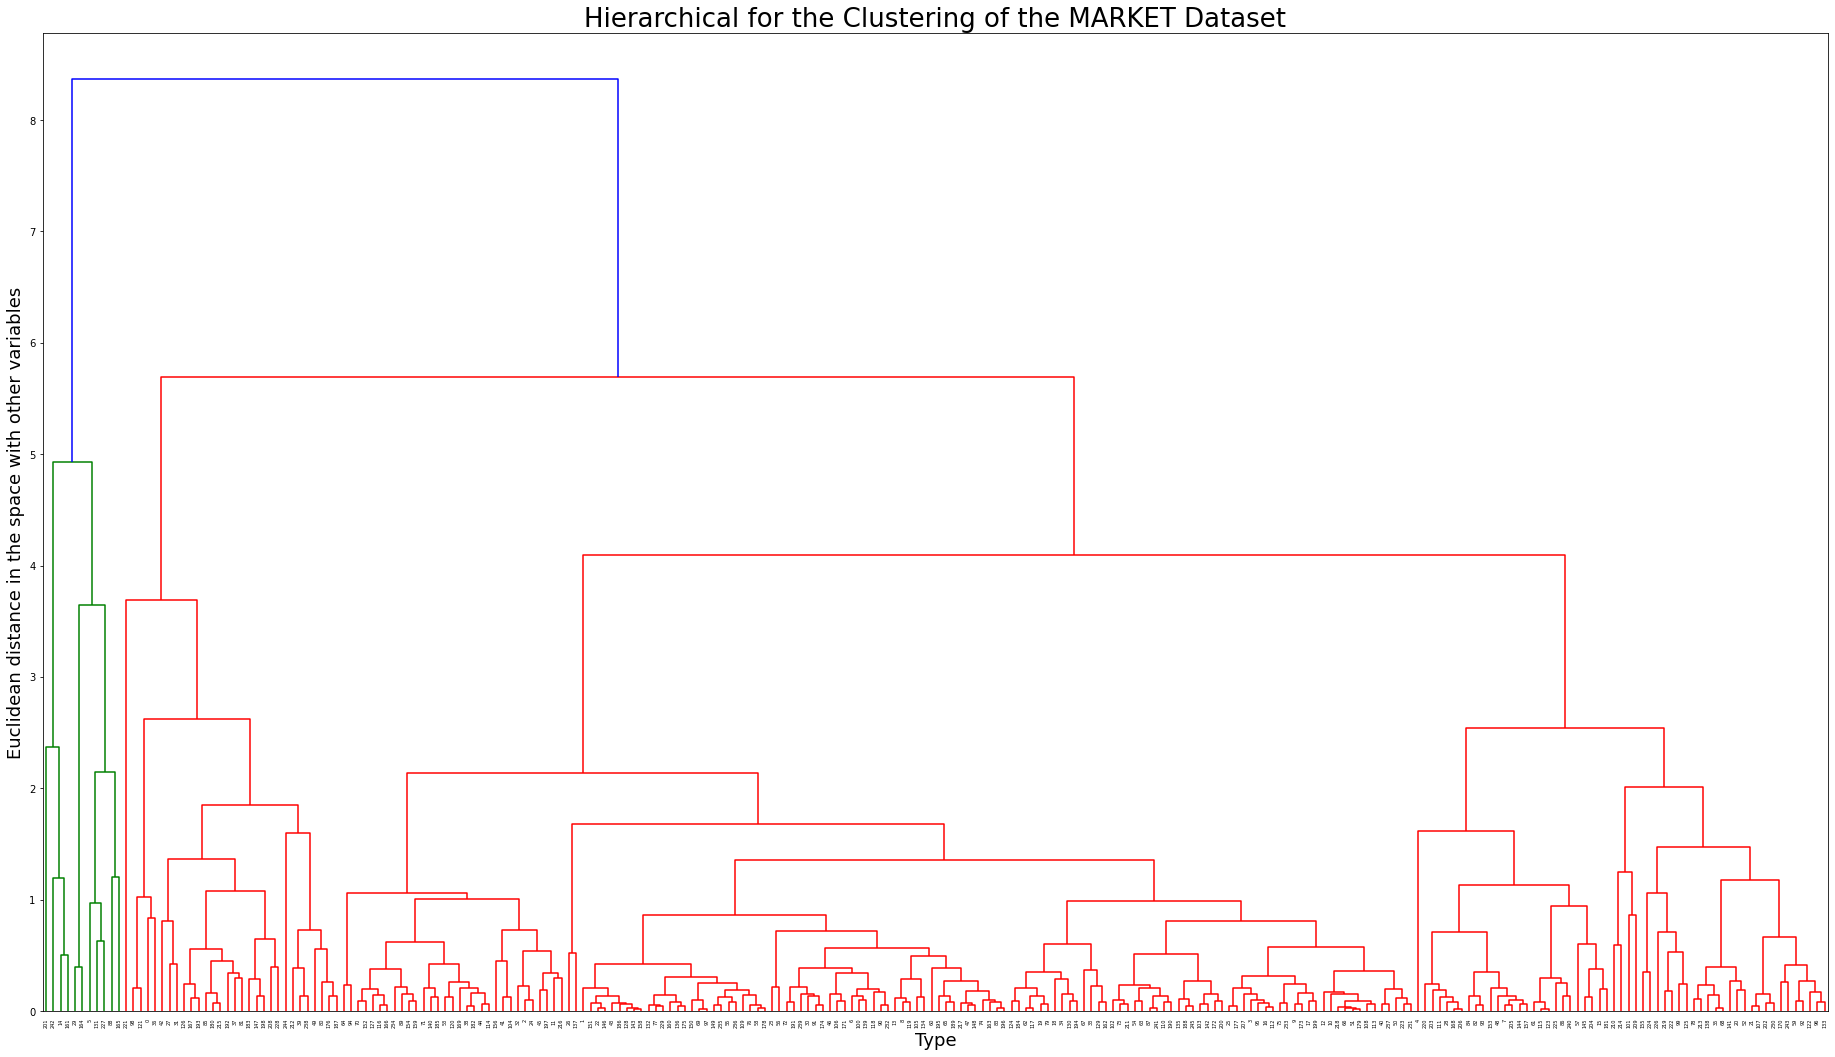

In [ ]:
# Complete linkage:
Hierarchical_clust = sch.linkage(rfm_df_scaled, method = 'complete')
plt.figure(figsize=(32,18))
den = sch.dendrogram(Hierarchical_clust)
plt.title('Hierarchical for the Clustering of the MARKET Dataset', fontsize=26)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Euclidean distance in the space with other variables', fontsize=18)
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

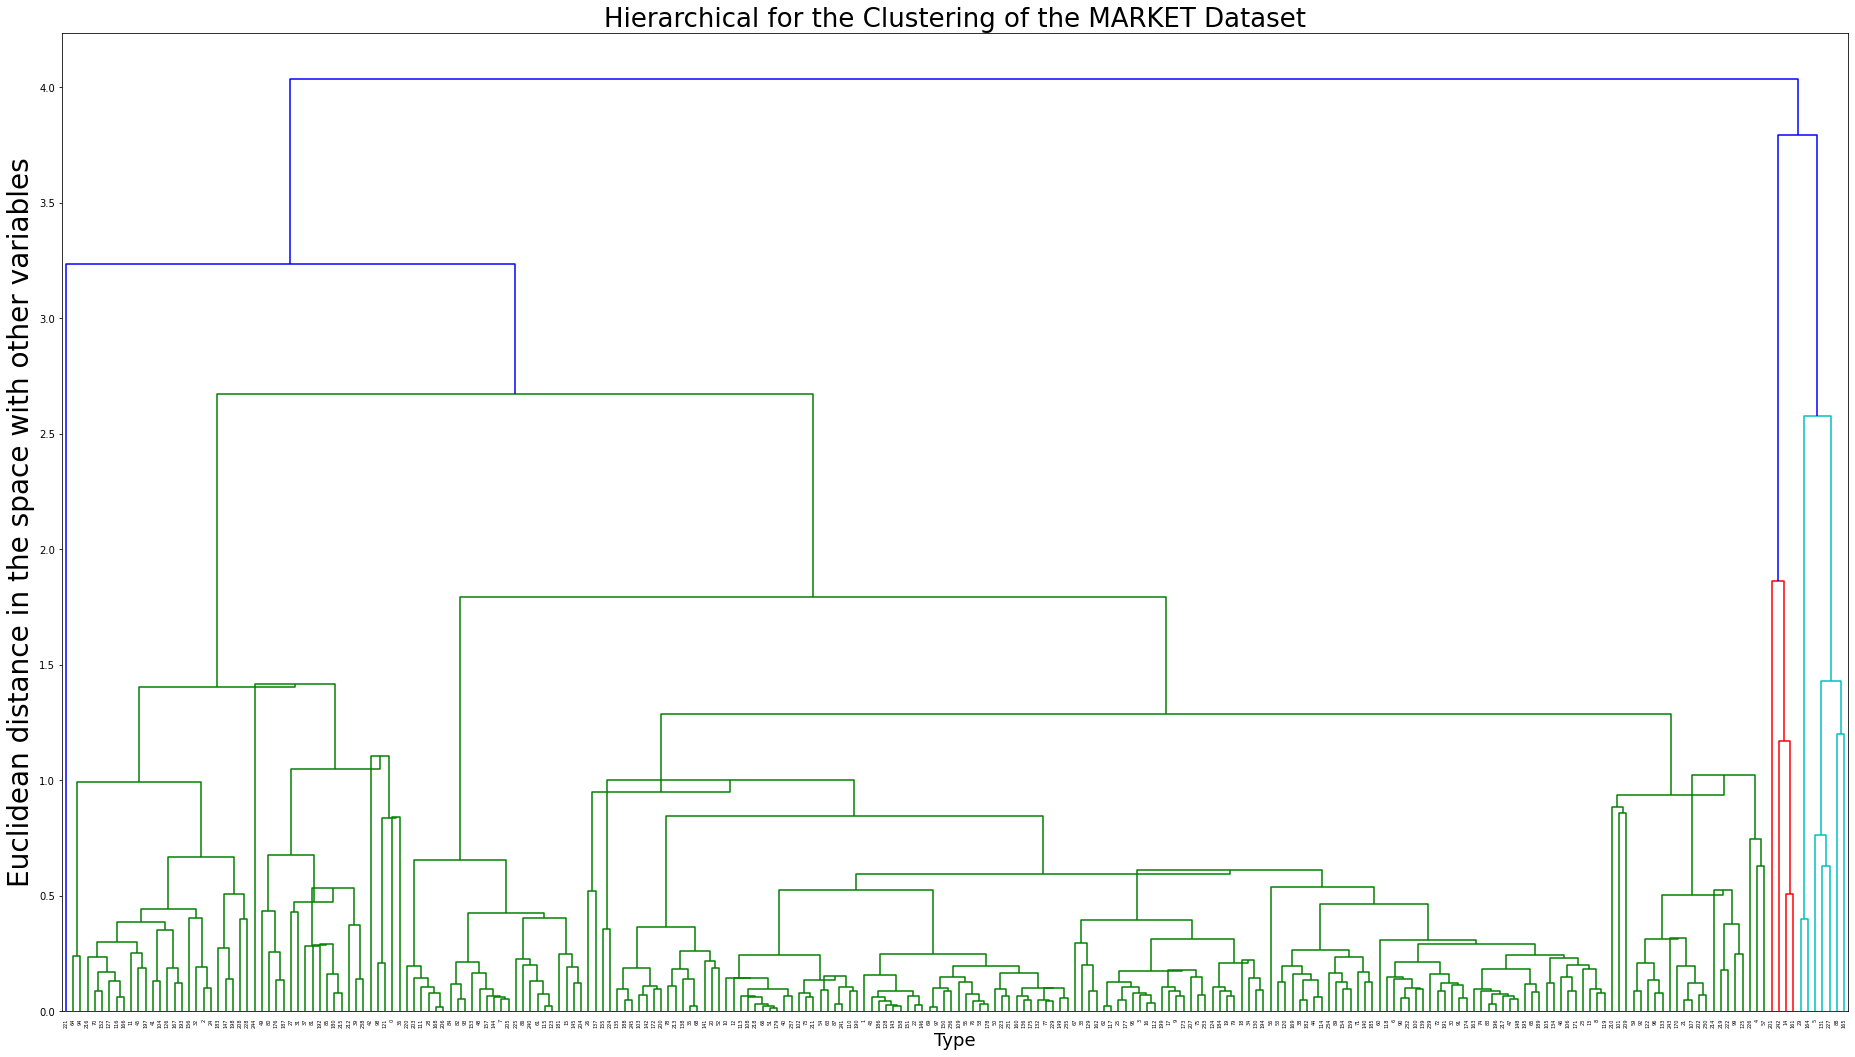

In [ ]:
# Median linkage method:
Hierarchical_clust = sch.linkage(rfm_df_scaled, method = 'median')
plt.figure(figsize=(32,18))
den = sch.dendrogram(Hierarchical_clust)
plt.title('Hierarchical for the Clustering of the MARKET Dataset', fontsize=26)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Euclidean distance in the space with other variables', fontsize=28)
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift # Our clustering algorithm

## Declaring X, y varaibles for building model and metrics

In [ ]:
y = rfm['Cluster_Id']
X = rfm.drop('Cluster_Id',axis=1)

In [ ]:
# 2nd Clustering Method (Hierarchical Agglomerative Clustering)
print("\n2nd Clustering Method: Hierarchical Agglomerative")
print("---------------------------------------------------")
model_agg = AgglomerativeClustering(n_clusters=3) # Build the Model
model_agg.fit(X) # Fit the model on the dataset
labels_agg = model_agg.labels_

print("Adjusted Random Score: ", adjusted_rand_score(labels_true, labels_agg))
print("Homogeneity Score: ", homogeneity_score(labels_true, labels_agg))
print("V-Measure Score: ", v_measure_score(labels_true, labels_agg))
print ("Completeness: ", completeness_score(labels_true, labels_agg))
print ("Adjusted Mutual Information: ", adjusted_mutual_info_score(labels_true, labels_agg))

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# 3rd Clustering Method (GausianMixtureModel Clustering)
print("\n3rd Clustering Method: GausianMixtureModel")
print("---------------------------------------------------")

model_gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=0)
model_gmm.fit(X)
labels_gmm = model_gmm.predict(X)

print("Adjusted Random Score: ", adjusted_rand_score(labels_true, labels_gmm))
print("Homogeneity Score: ", homogeneity_score(labels_true, labels_gmm))
print("V-Measure Score: ", v_measure_score(labels_true, labels_gmm))
print ("Completeness: ", completeness_score(labels_true, labels_gmm))
print ("Adjusted Mutual Information: ", adjusted_mutual_info_score(labels_true, labels_gmm))


3rd Clustering Method: GausianMixtureModel
---------------------------------------------------


NameError: ignored

In [ ]:
# 4th Clustering Method (MeanShift Clustering)
print("\n4th Clustering Method: MeanShift Clustering")
print("---------------------------------------------------")

model_ms = MeanShift()
model_ms.fit(X)
cluster_centers = model_ms.cluster_centers_
labels_ms = model_ms.labels_

print("Adjusted Random Score: ", adjusted_rand_score(labels_true, labels_ms))
print("Homogeneity Score: ", homogeneity_score(labels_true, labels_ms))
print("V-Measure Score: ", v_measure_score(labels_true, labels_ms))
print ("Completeness: ", completeness_score(labels_true, labels_ms))
print ("Adjusted Mutual Information: ", adjusted_mutual_info_score(labels_true, labels_ms))


4th Clustering Method: MeanShift Clustering
---------------------------------------------------
Adjusted Random Score:  0.36442844463446156
Homogeneity Score:  0.34255614928344835
V-Measure Score:  0.3936468852916038
Completeness:  0.4626489286931316
Adjusted Mutual Information:  0.37560977158483383


In [ ]:
# 3 clusters
from scipy.cluster.hierarchy import cut_tree
cluster_labels = kmeans.labels_
cluster_labels = cut_tree(Hierarchical_clust, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

Text(0.5, 1.0, 'Cluster_Labels V/s Frequency')

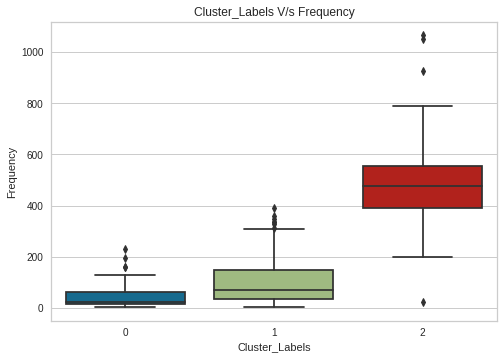

In [ ]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)
plt.title('Cluster_Labels V/s Frequency')

Text(0.5, 1.0, 'Cluster_Labels V/s Amount')

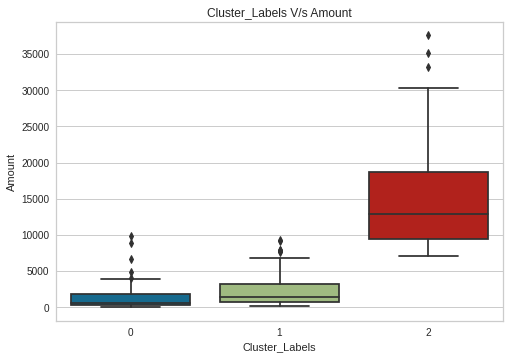

In [ ]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)
plt.title('Cluster_Labels V/s Amount')

Text(0.5, 1.0, 'Cluster_Labels V/s Recency')

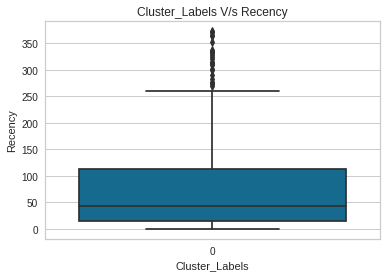

In [ ]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)
plt.title('Cluster_Labels V/s Recency')

# #Conclusion: First part
##K-Means Clustering(3 Cluster Ids):

1.   Customers with Cluster Id 1 have done major transactions.
2.   Customers having Cluster ID 1 appears frequent shoppers.
3.   Finally, customers having Cluster ID 2 are not recent shoppers so in terms  of commercial points are not considered essential. 
##Hierarchical Clustering(3 Cluster Labels):
1.   List itemCustomers with Cluster_Labels 2 have done major transactions.
2.   So as customers having Cluster_Labels 2 appear frequent shoppers.
3.   Finally, customers having Cluster_Labels 0 are not recent shoppers so in terms commercial points are not considered essential.



In [ ]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
brc.fit(rfm)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [ ]:
brc.predict(rfm)

array([0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 1])

In [ ]:
brc.labels_

array([0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 1])

In [ ]:
rfm['Cluster_brc'] = brc.labels_

In [ ]:
rfm.to_csv('rfm.csv')

In [ ]:
rfm.head()

,CustomerID,Amount,Frequency,Class,Recency,Cluster_Labels,Cluster_brc
0,12357.0,18623.01,393,393,32,0,0
1,12367.0,168.90,11,11,3,0,1
2,12371.0,5663.88,189,189,44,0,2
3,12372.0,1298.04,52,52,71,0,1
4,12377.0,4884.36,231,231,314,0,1


In [ ]:
from sklearn import cluster
birch = cluster.Birch(n_clusters='Cluster_brc')

Text(0.5, 1.0, 'Cluster_brc vs Frequency')

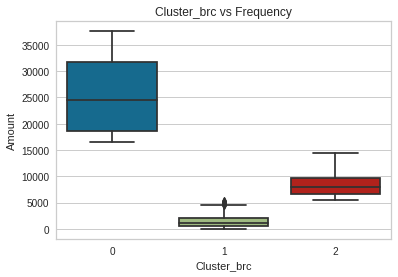

In [ ]:
# Box plot to visualize Cluster_brc vs Frequency

sns.boxplot(x='Cluster_brc', y='Amount', data=rfm)
plt.title('Cluster_brc vs Frequency')

The below code is refrence from https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

Text(0.5, 1.0, 'BIRCH clustering on rfm Dataset before fit with 4 Clusters')

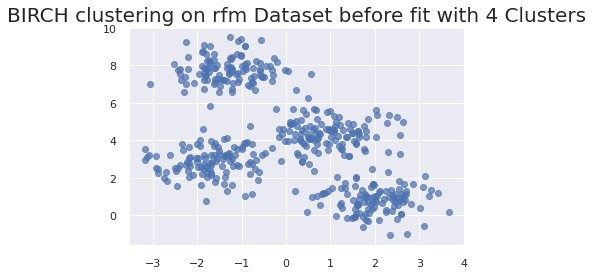

In [ ]:
rfm, clusters = make_blobs(n_samples=450, centers=4, cluster_std=0.70, random_state=0)
plt.scatter(rfm[:,0], rfm[:,1], alpha=0.7, edgecolors='b')
plt.title("BIRCH clustering on rfm Dataset before fit with " + str(i) + " Clusters", fontsize=20)


In [ ]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(rfm)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

In [ ]:
labels = brc.predict(rfm)

In [ ]:
labels

array([0, 0, 1, 0, 2, 3, 1, 2, 0, 0, 0, 3, 3, 2, 3, 1, 1, 0, 3, 1, 1, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 2, 0, 0, 0, 1, 3, 2, 2, 1, 0, 2, 2, 0, 0,
       3, 3, 1, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 1, 3, 2, 1, 2, 2, 3, 3, 3,
       2, 3, 0, 0, 0, 0, 2, 1, 1, 1, 2, 3, 1, 2, 3, 3, 2, 1, 2, 0, 2, 2,
       1, 3, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 3, 3, 2, 1, 1, 2, 2,
       1, 0, 1, 2, 1, 2, 2, 3, 0, 1, 0, 3, 0, 1, 1, 3, 1, 0, 2, 0, 3, 1,
       0, 2, 3, 3, 0, 3, 3, 2, 1, 1, 3, 0, 0, 3, 1, 1, 0, 1, 2, 3, 1, 2,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 1, 1, 3, 1, 3, 2, 2, 3,
       1, 1, 2, 2, 0, 0, 0, 3, 2, 1, 3, 0, 1, 3, 0, 0, 1, 2, 3, 0, 1, 2,
       2, 3, 0, 1, 1, 0, 1, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 3, 0, 2, 0, 2,
       0, 2, 3, 3, 2, 3, 1, 1, 3, 1, 2, 0, 0, 3, 3, 1, 2, 1, 2, 3, 2, 1,
       0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 0, 0, 3, 1, 2, 3, 1,
       1, 0, 0, 3, 0, 2, 1, 2, 3, 0, 1, 3, 1, 2, 0, 1, 3, 1, 0, 2, 1, 1,
       0, 0, 2, 0, 3, 2, 2, 1, 3, 2, 1, 3, 0, 2, 0,

Text(0.5, 1.0, 'BIRCH clustering on rfm Dataset with 4 Clusters')

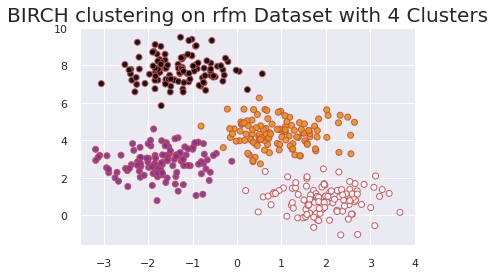

In [ ]:
plt.scatter(rfm[:,0], rfm[:,1], c=labels, cmap='CMRmap', alpha=0.9, edgecolors='r')
plt.title("BIRCH clustering on rfm Dataset with " + str(i) + " Clusters", fontsize=20)


#Conclusion: Part 2

##Conclusion for BIRCH clustering: 
BIRCH provides a clustering method for very large datasets. It makes a large clustering problem plausible by concentrating on densely occupied regions, and creating a compact summary. BIRCH can work with any given amount of memory, and the I/O complexity is a little more than one scan of data. Other clustering algorithms can be applied to the subclusters produced by BIRCH.

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn import metrics

from sklearn.metrics import adjusted_rand_score, homogeneity_score, v_measure_score, completeness_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
labels_true = labels

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    labels_true = kmeans.labels_
    
    # silhouette score
    adjusted_rand_score = adjusted_rand_score(labels_true,rfm_df_scaled)
    print("For n_clusters={0}, adjusted_rand_score is {1}".format(num_clusters, adjusted_rand_score))

In [ ]:
print("Adjusted Random Score: ", adjusted_rand_score(labels_true,cluster_labels))
print("Homogeneity Score: ", homogeneity_score(labels_true, cluster_labels))
print("V-Measure Score: ", v_measure_score(labels_true, cluster_labels))
print ("Completeness: ", completeness_score(labels_true, cluster_labels))
print ("Adjusted Mutual Information: ", adjusted_mutual_info_score(labels_true, cluster_labels))

Adjusted Random Score:  0.42969022210546376
Homogeneity Score:  0.7991720239679262
V-Measure Score:  0.5395083807704116
Completeness:  0.4072020030853198
Adjusted Mutual Information:  0.5365939364762601
